### Importing required packages

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from pathlib import Path
import seaborn as sb

### Loading the dataset

In [13]:
# https://huggingface.co/datasets/scikit-learn/iris
ROOT = Path("__file__").resolve().parent.parent 
IRIS_DATA = ROOT / "dataset/Iris.csv"
df = pd.read_csv(IRIS_DATA)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking the total number of rows and columns

In [14]:
df.shape

(150, 6)

### Checking column datatypes and null values.
#### Can also use df.isna() for checking null values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Getting dataframe summary

In [16]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Plotting count of different species

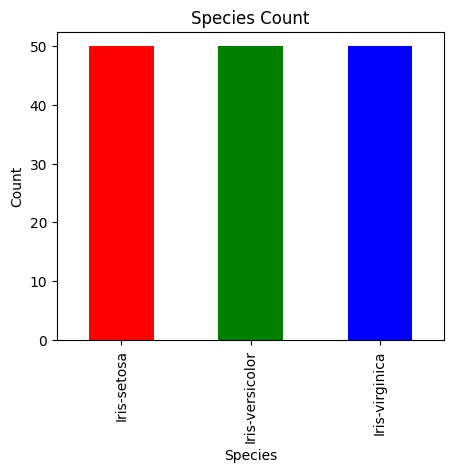

In [17]:
plt.figure(figsize=(5, 4))
df["Species"].value_counts().sort_index().plot.bar(color=["red", "green", "blue"])
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Species Count")
plt.show()

### Comparing properties of flowers

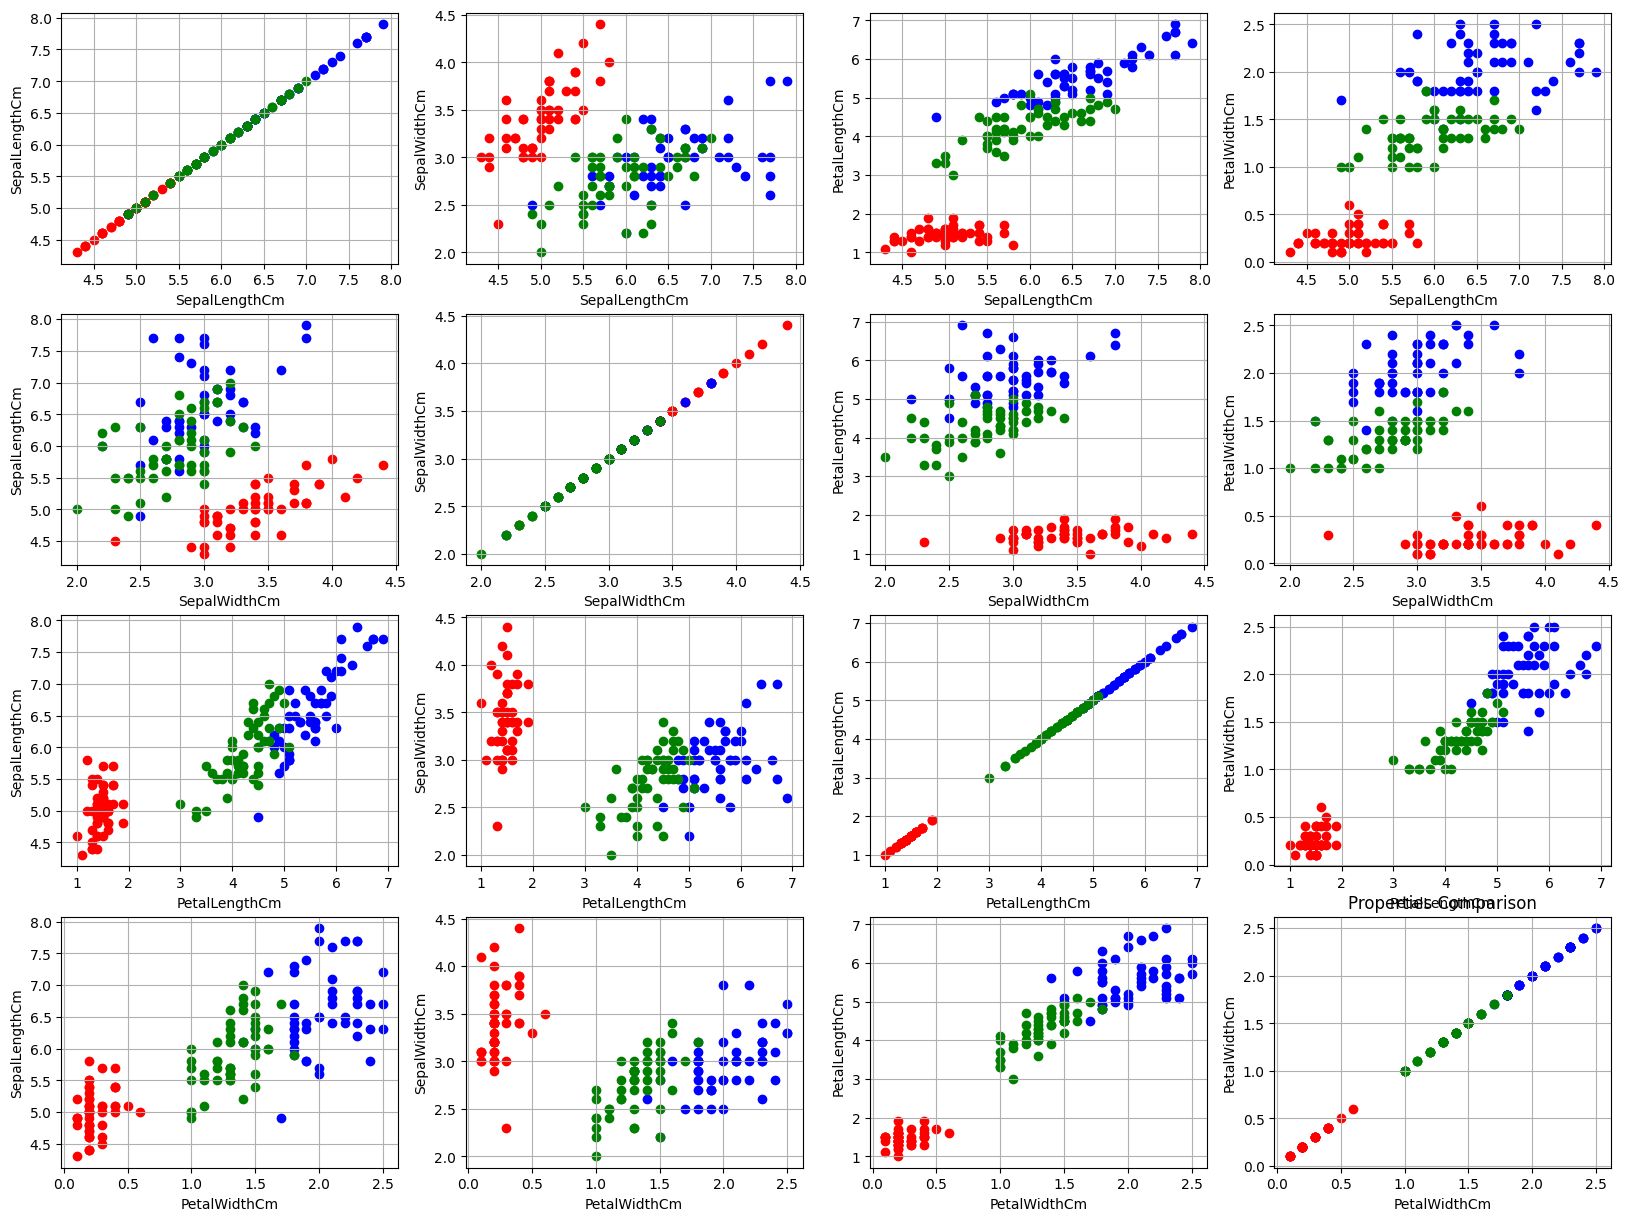

In [18]:
properties = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
setosa = df[df['Species'] == "Iris-setosa"][properties]
virginica = df[df['Species'] == "Iris-virginica"][properties]
versicolor = df[df['Species'] == "Iris-versicolor"][properties]

plt.figure(figsize=(20, 15))
for i in range(0, 4):
    for j in range(0, 4):
        plt.subplot(4, 4, (i * 4) + (j + 1))
        plt.scatter(setosa[properties[i]], setosa[properties[j]], color='r')
        plt.scatter(virginica[properties[i]], virginica[properties[j]], color='b')
        plt.scatter(versicolor[properties[i]], versicolor[properties[j]], color='g')
        plt.xlabel(properties[i])
        plt.ylabel(properties[j])
        plt.grid(True)
plt.title("Properties Comparison")
plt.show()

### Correlation Matrix

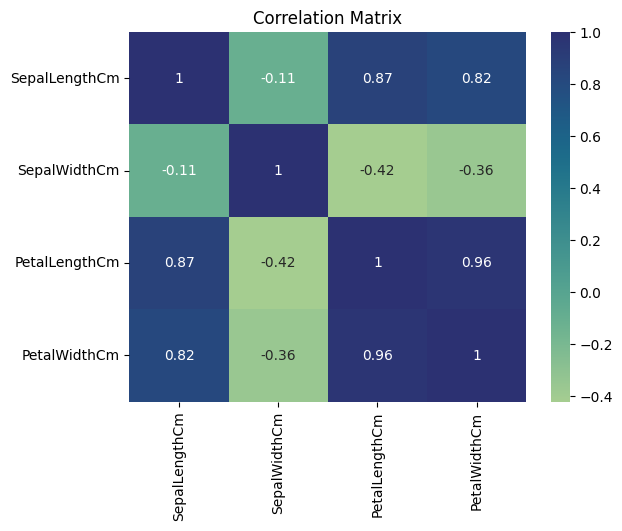

In [32]:
corr_mat = df[properties].corr()
plt.figure()
sb.heatmap(corr_mat, annot=True, cmap="crest")
plt.title("Correlation Matrix")
plt.show()

### Converting target column species from string to integer values

In [19]:
species = {"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2}
df["SpeciesInteger"] = df["Species"].apply(lambda x: species[x])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesInteger
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### Boxplot

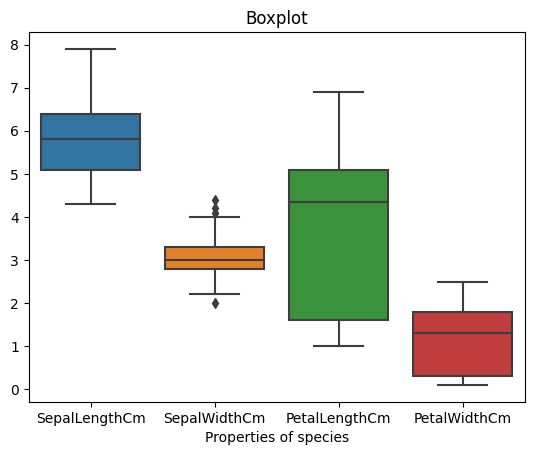

In [39]:
plt.figure()
sb.boxplot(df[properties])
plt.xlabel("Properties of species")
plt.title("Boxplot")
plt.show()

<Figure size 640x480 with 0 Axes>

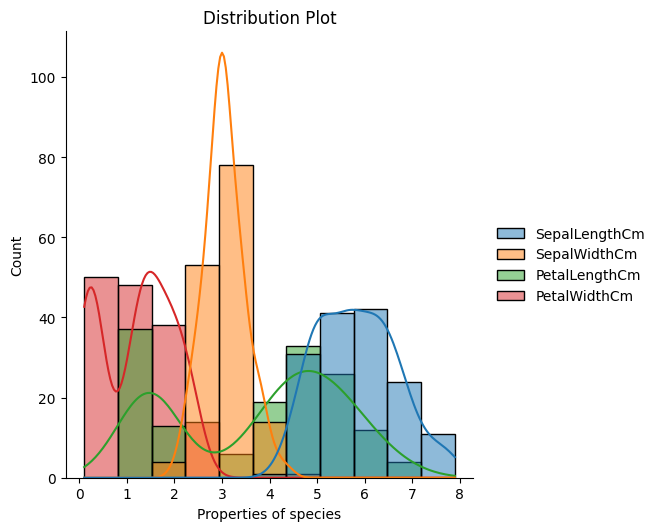

In [41]:
plt.figure()
sb.displot(df[properties], kde=True)
plt.xlabel("Properties of species")
plt.title("Distribution Plot")
plt.show()

### Training a Decision Tree Classifier

In [20]:
# Dividing data into labels and features
X = df[properties]
y = df["SpeciesInteger"]

# Splitting data intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_model = classifier.fit(X_train, y_train)

### Plotting the tree

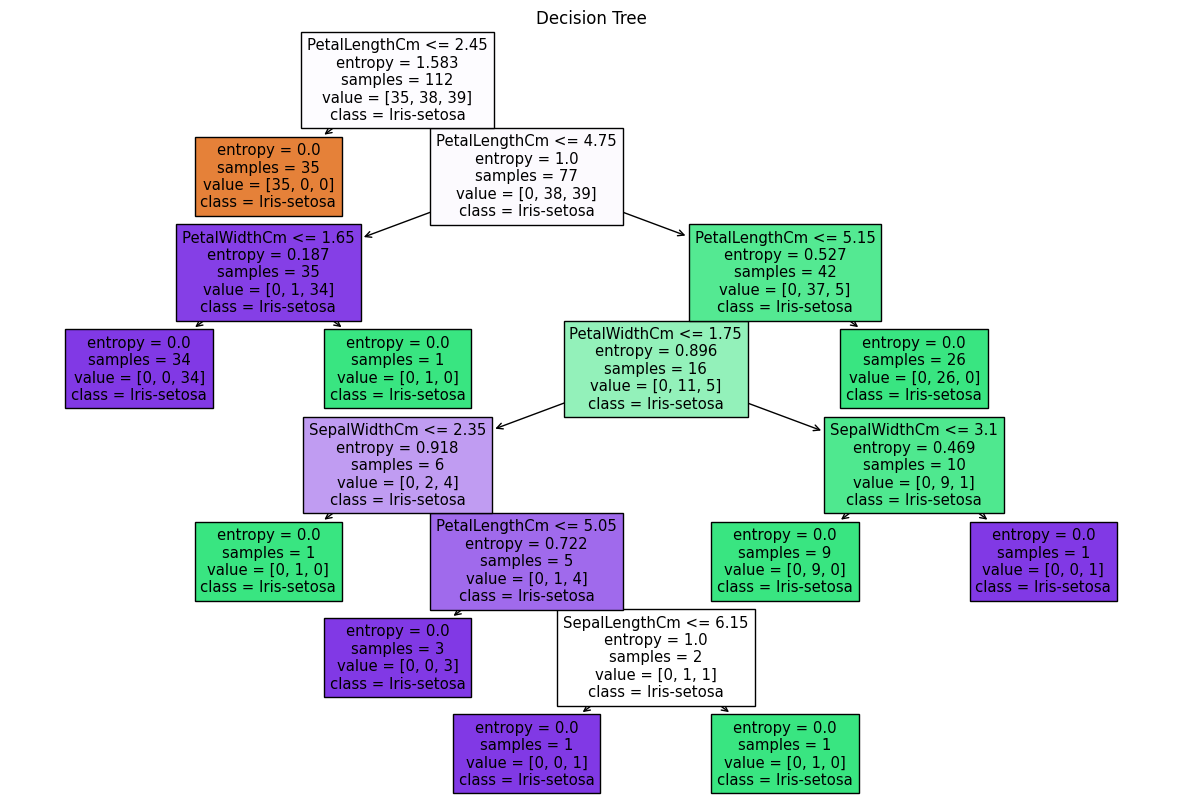

In [23]:
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=properties, class_names=df["Species"], filled=True)
plt.title("Decision Tree")
plt.show()

### Plotting the confusion matrix

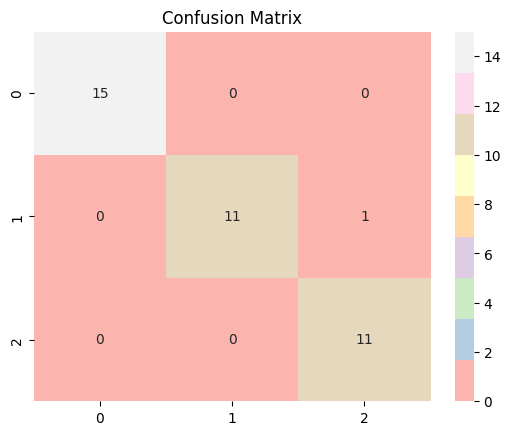

In [30]:
prediction = tree_model.predict(X_test)
cf_mat = confusion_matrix(y_test, prediction)
plt.figure()
sb.heatmap(cf_mat, annot=True, cmap="Pastel1")
plt.title("Confusion Matrix")
plt.show()